In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential,Model

In [32]:
image_size=[100,100]
model=ResNet50(input_shape=image_size+[3],include_top=False, weights='imagenet')


94773248/94765736 [==============================] - 1s 0us/step


In [33]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [34]:
for layers in model.layers:
  layers.trainable=False

In [35]:
model.output

<KerasTensor: shape=(None, 4, 4, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [36]:
x=(Flatten()(model.output))

In [37]:
final_model=Model(inputs=model.input,outputs=(Dense(2,activation="softmax")(x)))

In [38]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [39]:
model.input

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_2')>

In [40]:
final_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
train_path="/content/drive/MyDrive/CollabNotebooks/training_set/training_set"
test_path="/content/drive/MyDrive/CollabNotebooks/test_set/test_set"

In [43]:
train_augmen=ImageDataGenerator(rescale=1./255,shear_range=0.3,zoom_range=0.2,horizontal_flip=True)
test_augmen=ImageDataGenerator(rescale=1./255)

In [44]:
final_train=train_augmen.flow_from_directory(train_path,target_size=(100,100),batch_size=35,class_mode='categorical')

Found 8005 images belonging to 2 classes.


In [45]:
final_test=train_augmen.flow_from_directory(test_path,target_size=(100,100),batch_size=35,class_mode='categorical')

Found 2023 images belonging to 2 classes.


In [46]:
l=len(final_test)

In [49]:
ResNet50=final_model.fit_generator(final_train,epochs=20,steps_per_epoch=15,validation_data=final_test,validation_steps=l)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
15/15 [==============================] - 1167s 83s/step - loss: 0.7602 - accuracy: 0.5752 - val_loss: 0.7174 - val_accuracy: 0.5902
Epoch 2/20
15/15 [==============================] - 287s 19s/step - loss: 0.7164 - accuracy: 0.5733 - val_loss: 0.7413 - val_accuracy: 0.5052
Epoch 3/20
15/15 [==============================] - 281s 19s/step - loss: 0.6955 - accuracy: 0.5790 - val_loss: 0.6960 - val_accuracy: 0.5966
Epoch 4/20
15/15 [==============================] - 264s 18s/step - loss: 0.7006 - accuracy: 0.5505 - val_loss: 0.6886 - val_accuracy: 0.5680
Epoch 5/20
15/15 [==============================] - 243s 17s/step - loss: 0.7240 - accuracy: 0.5243 - val_loss: 0.8226 - val_accuracy: 0.5126
Epoch 6/20
15/15 [==============================] - 233s 16s/step - loss: 0.8026 - accuracy: 0.5448 - val_loss: 0.6720 - val_accuracy: 0.6055
Epoch 7/20
15/15 [==============================] - 271s 19s/step - loss: 0.8211 - accuracy: 0.5486 - val_loss: 0.6553 - val_accuracy: 0.6218
Epoch

In [51]:
final_model.save('/content/drive/MyDrive/CollabNotebooks/ResNet50model.h5')
#Saving our model file

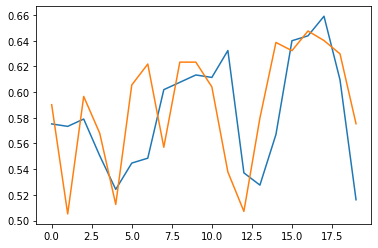

In [54]:
#Evaluating our model accuracy
import matplotlib.pyplot as plt
plt.plot(ResNet50.history['accuracy'])
plt.plot(ResNet50.history['val_accuracy'])
plt.show()

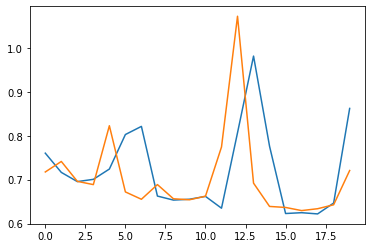

In [55]:
#Evaluating our model accuracy
import matplotlib.pyplot as plt
plt.plot(ResNet50.history['loss'])
plt.plot(ResNet50.history['val_loss'])
plt.show()

In [60]:
import numpy as np
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/drive/MyDrive/CollabNotebooks/test_set/test_set/dogs/dog.4001.jpg',target_size=(100,100))


In [61]:
image_array=image.img_to_array(img)
image_array=np.expand_dims(image_array/255,axis=0)

In [62]:
final_model.predict(image_array)

array([[0.73838276, 0.2616172 ]], dtype=float32)

In [ ]:
#We had 2 folders in our drive,First is dog and other is cat.
#We passed the image of dog and our model predicted 73%-dog